# New Road Detection

This notebook demonstrates new road detection using results from the Analytics API Road Detection feed.

More information about the Analytics API can be found in the Developers Resource Center [Analytics API](https://developers.planet.com/docs/analytics/) page.

In [1]:
import json
import os
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from planet import api
from planet.api.utils import write_to_file
import rasterio
from rasterio.plot import show

## Setup

In [2]:
# if your Planet API Key is not set as an environment variable, you can paste it below
API_KEY = os.environ.get('PL_API_KEY', 'PASTE_YOUR_KEY_HERE')

# note: base_url specification shouldn't be needed in release 1.4.3. The source code already has a fix
analytics_client = api.ClientV1(api_key=API_KEY, base_url='https://api.planet.com/analytics/')

### Setup Subscription

In [3]:
# This ID is for a subscription for monthly road detection in Kirazli, Turkey
SUBSCRIPTION_ID = 'f184516c-b948-406f-b257-deaa66c3f38a'

In [4]:
# Get subscription details

subscription_info = analytics_client.get_subscription_info(SUBSCRIPTION_ID).get()

# subscription_info = get_response(subscription_info_url)
select_keys = ('description', 'title', 'startTime', 'endTime')
# subscription_info = dict((k, subscription_info[k]) for k in select_keys)
pprint(subscription_info)

{'created': '2019-10-11T21:43:29.294Z',
 'description': 'Monthly Road Detection  (2017-2019)',
 'endTime': '2019-08-01T00:00:00.000Z',
 'feedID': '36d9d1b0-dcd4-40bc-b411-5eb8e06062a2',
 'geometry': {'coordinates': [[[26.6790962219238, 39.9676482528045],
                               [26.8025207519531, 39.9676482528045],
                               [26.8025207519531, 40.0548185495135],
                               [26.6790962219238, 40.0548185495135],
                               [26.6790962219238, 39.9676482528045]]],
              'type': 'Polygon'},
 'id': 'f184516c-b948-406f-b257-deaa66c3f38a',
 'links': [{'href': 'https://api.planet.com/analytics/subscriptions/f184516c-b948-406f-b257-deaa66c3f38a',
            'rel': 'self',
            'type': 'application/json'},
           {'href': 'https://api.planet.com/analytics/collections/f184516c-b948-406f-b257-deaa66c3f38a/items',
            'rel': 'results',
            'type': 'application/geo+json'},
           {'href': 'http

## Subscription Results

In [5]:
collection_info = analytics_client.get_collection_info(SUBSCRIPTION_ID).get()
pprint(collection_info)

{'created': '2019-10-11T21:43:29.294Z',
 'description': 'Monthly Road Detection  (2017-2019)',
 'extent': {'spatial': {'bbox': [[26.6790962219238,
                                  39.9676482528045,
                                  26.8025207519531,
                                  40.0548185495135]]},
            'temporal': {'interval': [['2017-08-01T00:00:00.000Z',
                                       '2019-08-01T00:00:00.000Z']]}},
 'id': 'f184516c-b948-406f-b257-deaa66c3f38a',
 'links': [{'href': 'https://api.planet.com/analytics/collections/f184516c-b948-406f-b257-deaa66c3f38a',
            'rel': 'self',
            'type': 'application/json'},
           {'href': 'https://api.planet.com/analytics/collections/f184516c-b948-406f-b257-deaa66c3f38a/items',
            'rel': 'items',
            'type': 'application/geo+json'},
           {'href': 'https://api.planet.com/analytics/collections',
            'rel': 'collections',
            'type': 'application/json'},
         

In [6]:
results = analytics_client.list_collection_features(SUBSCRIPTION_ID).get()

In [7]:
results.keys()

dict_keys(['features', 'links', 'type'])

In [8]:
results['links']

[{'href': 'https://api.planet.com/analytics/collections/f184516c-b948-406f-b257-deaa66c3f38a/items',
  'rel': 'self',
  'type': 'application/geo+json'},
 {'href': 'https://api.planet.com/analytics/collections/f184516c-b948-406f-b257-deaa66c3f38a',
  'rel': 'collection',
  'type': 'application/json'}]

In [9]:
len(results['features'])

96

In [10]:
results['features'][0]

{'created': '2019-10-11T23:47:27.690Z',
 'geometry': {'coordinates': [[[26.7187499963, 40.04443758],
    [26.7187499963, 40.1788733097],
    [26.5429687464, 40.1788733097],
    [26.5429687464, 40.04443758],
    [26.7187499963, 40.04443758]]],
  'type': 'Polygon'},
 'id': '392817ab-cccf-4e23-8f54-c587266b5c45',
 'links': [{'href': 'https://api.planet.com/analytics/collections/f184516c-b948-406f-b257-deaa66c3f38a/items/392817ab-cccf-4e23-8f54-c587266b5c45',
   'rel': 'self',
   'type': 'application/geo+json'},
  {'href': 'https://api.planet.com/analytics/collections/f184516c-b948-406f-b257-deaa66c3f38a/items/392817ab-cccf-4e23-8f54-c587266b5c45/resources/source-quad',
   'rel': 'source-quad',
   'type': 'image/tiff'},
  {'href': 'https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2019_05_mosaic/gmap/{z}/{x}/{y}.png?api_key=fa15453ff4fb4d109bd5b27fdfec5b94',
   'rel': 'source-tiles',
   'type': 'image/png'},
  {'href': 'https://api.planet.com/analytics/collections/f184516c-b

In [11]:
features = results['features']

In [12]:
# count number of images per quad id
quad_ids = np.unique(np.array([f['properties']['target_quad_id'] for f in features]))

print('quad_id:\tcount')
for q_id in quad_ids:
    matches = [f for f in features if f['properties']['target_quad_id'] == q_id]
    print('{}:\t{}'.format(q_id, len(matches)))

quad_id:	count
1175-1272:	24
1175-1273:	24
1176-1272:	24
1176-1273:	24


In [13]:
quad_id = quad_ids[0]
quad_id

'1175-1272'

In [14]:
from operator import itemgetter

In [15]:
quad_features = [f for f in features if f['properties']['target_quad_id'] == quad_id]

# sort features by acquisition date
quad_features.sort(key=lambda k: k['properties']['first_acquired']) 
for m in quad_features:
    print(m['properties']['first_acquired'])

2017-08-01T00:00:00Z
2017-09-01T00:00:00Z
2017-10-01T00:00:00Z
2017-11-01T00:00:00Z
2017-12-01T00:00:00Z
2018-01-01T00:00:00Z
2018-02-01T00:00:00Z
2018-03-01T00:00:00Z
2018-04-01T00:00:00Z
2018-05-01T00:00:00Z
2018-06-01T00:00:00Z
2018-07-01T00:00:00Z
2018-08-01T00:00:00Z
2018-09-01T00:00:00Z
2018-10-01T00:00:00Z
2018-11-01T00:00:00Z
2018-12-01T00:00:00Z
2019-01-01T00:00:00Z
2019-02-01T00:00:00Z
2019-03-01T00:00:00Z
2019-04-01T00:00:00Z
2019-05-01T00:00:00Z
2019-06-01T00:00:00Z
2019-07-01T00:00:00Z


## Download Resource

Here we will download one target quad image from the first feature

This can also be accomplished in the planet client cli with:
```
planet analytics collections features get $RESOURCE_TYPE $SUBSCRIPTION_ID $FEATURE_ID
```

In [18]:
def create_save_dir(root_dir='data'):
    save_dir = root_dir

    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    return save_dir

dest = 'data'
create_save_dir(dest)

'data'

In [19]:
RESOURCE_TYPE = 'target-quad'

We want to save each all of the images in one directory. But all of the images for a single target quad have the same name, `L15_{target_quad_id}`. We use the function `write_to_file` to save the image, and that function pulls the name from the resource `name` attribute, which we can't set. So, we are going to make a new object that functions just like resource, but has the `name` attribute set to the acquisition date. It would be nice if the `write_to_file` function just allowed us to set the name, like it allows us to set the directory.

In [20]:
from planet.api.models import Body

In [21]:
def download_feature(feature, subscription_id, resource_type):
    print('{}: acquired {}'.format(feature['id'], get_date(feature)))
    resource = analytics_client.get_associated_resource_for_analytic_feature(subscription_id,
                                                                             feature['id'],
                                                                             resource_type)
    
    named_resource = NamedBody(resource, get_name(feature))
    filename = download_resource(named_resource, dest)
    return filename

def get_date(feature):
    feature_acquired = feature['properties']['first_acquired']
    return feature_acquired.split('T',1)[0]

def get_name(feature):
    return feature['properties']['target_quad_id'] + '_' + get_date(feature) + '.tif'

def download_resource(resource, dest, overwrite=False):
    writer = write_to_file(dest, overwrite=overwrite)
    writer(resource)
    filename = os.path.join(dest, resource.name)
    print('file saved to: {}'.format(filename))
    return filename

class NamedBody(Body):
    def __init__(self, body, name):
        super(NamedBody, self).__init__(body._request, body.response, body._dispatcher)
        self._name = name
        
    @property
    def name(self):
        return self._name

In [22]:
filename = download_feature(quad_features[0], SUBSCRIPTION_ID, RESOURCE_TYPE)

6cabb1f3-218a-4956-9fa3-821c6379ac13: acquired 2017-08-01
file saved to: data/1175-1272_2017-08-01.tif


In [ ]:
filename2 = download_feature(quad_features[-1], SUBSCRIPTION_ID, RESOURCE_TYPE)

### Visualize Roads Image

In [136]:
from rasterio.enums import Resampling

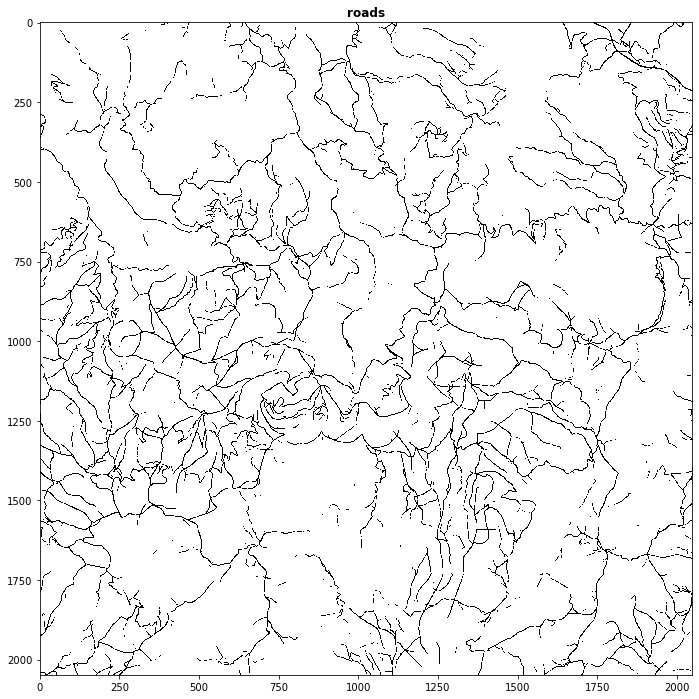

In [201]:
def open(filename, factor=2):
    with rasterio.open(filename) as dataset:
        height = int(dataset.height / factor)
        width = int(dataset.width / factor)
        data = dataset.read(
            out_shape=(dataset.count, height, width)
        )
    return data[0,:,:].astype(bool)

factor = 2
figsize = tuple(2 * [int(25/factor)])

roads = open(filename, factor=factor)
fig = plt.figure(figsize=figsize)
show(roads, title="roads", cmap="binary")

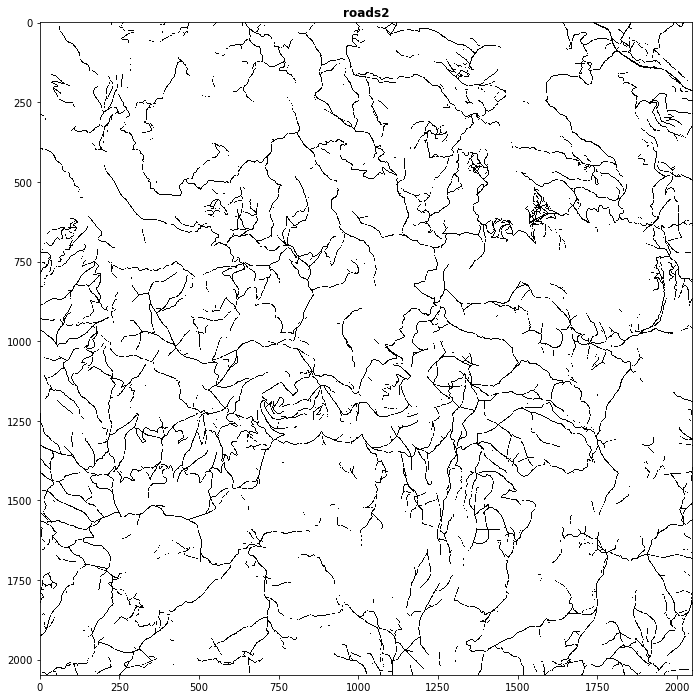

In [202]:
roads2 = open(filename2, factor=factor)
fig = plt.figure(figsize=figsize)
show(roads2, title="roads2", cmap="binary")

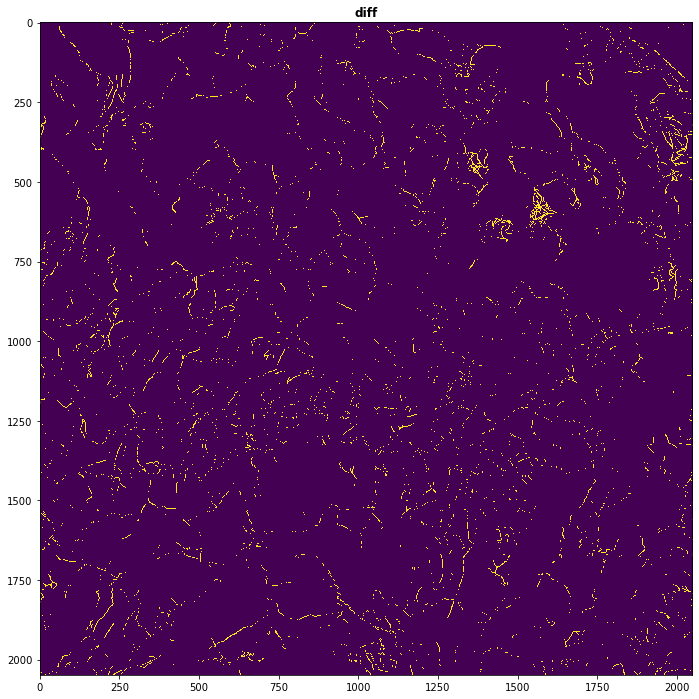

In [203]:
# Difference highlighting pixels where the two road images differ

fig = plt.figure(figsize=figsize)
diff = np.bitwise_xor(roads, roads2)
show(diff, title="diff")

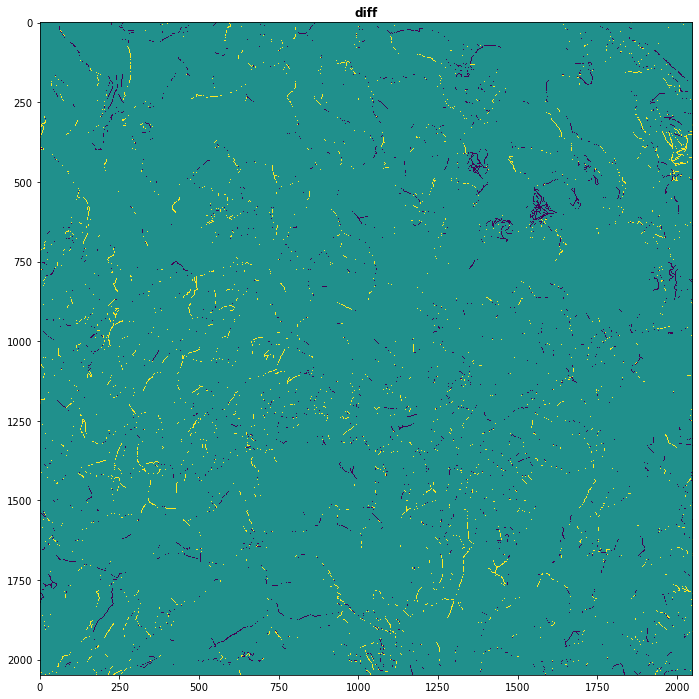

In [205]:
# Difference highlighting roads that have appeared or disappeared

fig = plt.figure(figsize=figsize)
diff_subtraction = roads.astype(np.int8) - roads2.astype(np.int8)
show(diff_subtraction, title="diff")

## Detect Real Change

Image processing steps to clean up difference image and detect real change in roads.

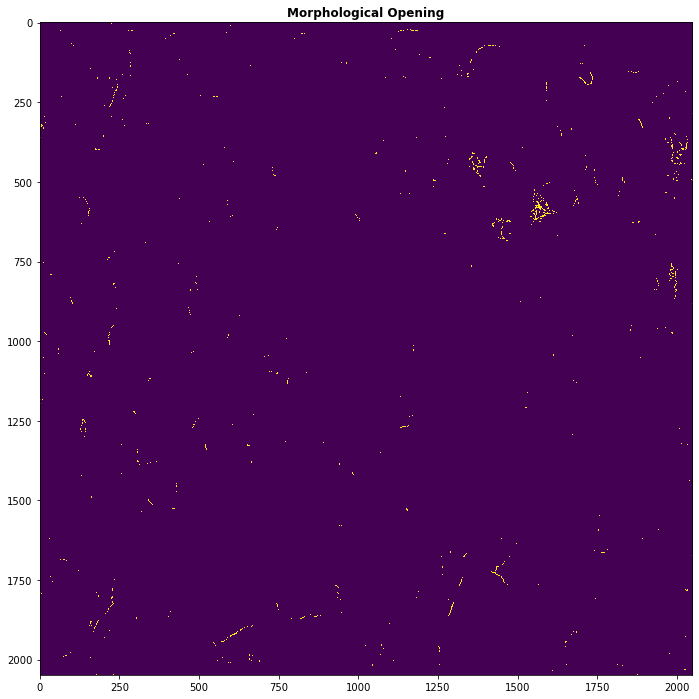

In [207]:
fig = plt.figure(figsize=figsize)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(diff.astype(np.uint8), cv2.MORPH_OPEN, kernel)
show(opening, title="Morphological Opening")

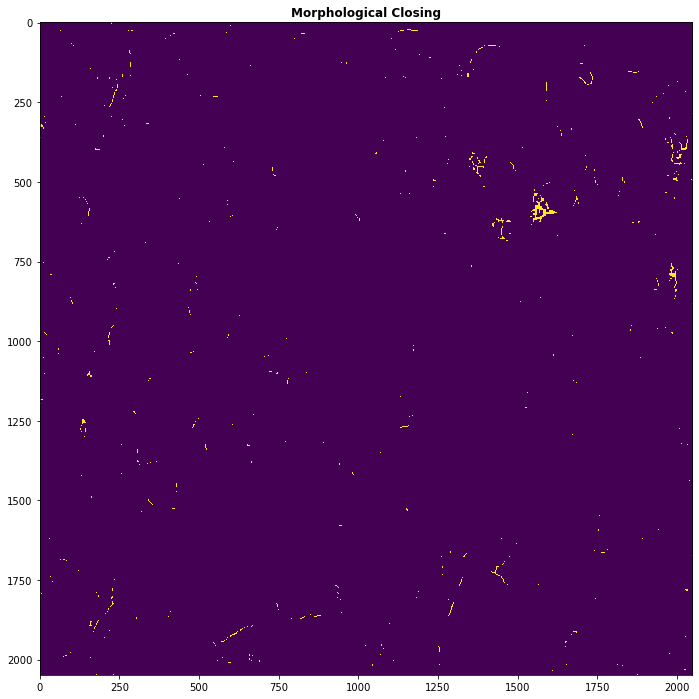

In [208]:
fig = plt.figure(figsize=figsize)
kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
show(closing, title="Morphological Closing")

Find real change by size of connected shapes

In [161]:
import scipy

In [163]:
from scipy import ndimage

In [200]:
# ndimage.label??

In [180]:
labeled = ndimage.label(closing)
labeled_img = labeled[0]

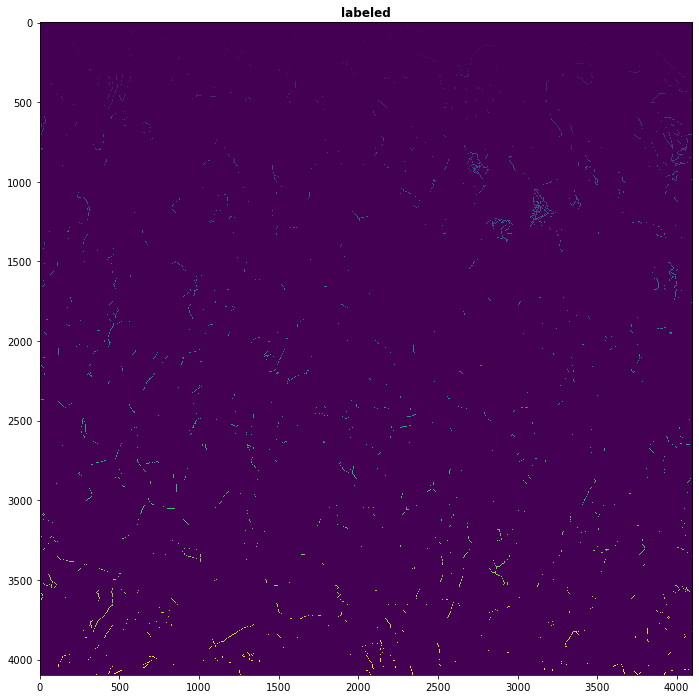

In [209]:
fig = plt.figure(figsize=figsize)
show(labeled_img, title="labeled")

In [210]:
# remove background and find pixel count for each label
labels = np.unique(labeled_img)[1:]
counts = [np.count_nonzero(labeled_img == l) for l in labels]

In [211]:
np.histogram(counts, bins=100)

(array([1431,  221,   80,   51,   30,   22,   14,    9,    3,    7,    2,
           1,    1,    1,    1,    2,    1,    0,    1,    0,    1,    0,
           0,    1,    1,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1]),
 array([   6.  ,   64.51,  123.02,  181.53,  240.04,  298.55,  357.06,
         415.57,  474.08,  532.59,  591.1 ,  649.61,  708.12,  766.63,
         825.14,  883.65,  942.16, 1000.67, 1059.18, 1117.69, 1176.2 ,
        1234.71, 1293.22, 1351.73, 1410.24, 1468.75, 1527.26, 1585.77,
        1644.28, 1702.79, 1761.3 ,

## Look at a subset of the imagery with change

/opt/conda/lib/python3.6/site-packages/rasterio/plot.py:140: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax.imshow(arr, **kwargs)


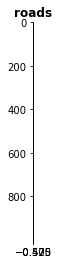

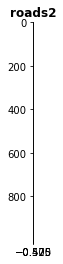

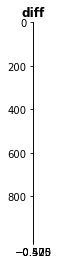

In [212]:
def get_subset(image, rmin, rmax, cmin, cmax):
    return image[rmin:rmax, cmin:cmax]


rmin, rmax, cmin, cmax = (500, 1500, 3000, 4000)

roads_subset = get_subset(roads, rmin, rmax, cmin, cmax)
roads2_subset = get_subset(roads2, rmin, rmax, cmin, cmax)
diff_subset = roads_subset.astype(np.int8) - roads2_subset.astype(np.int8)
diff_subset = np.bitwise_xor(roads_subset, roads2_subset)

show(roads_subset, title="roads")
show(roads2_subset, title="roads2")
show(diff_subset, title="diff")